In [38]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
import cv2 as cv

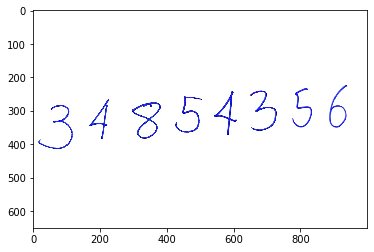

In [40]:
img = cv.imread("numbers.jpg")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

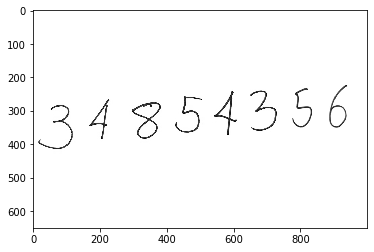

In [41]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

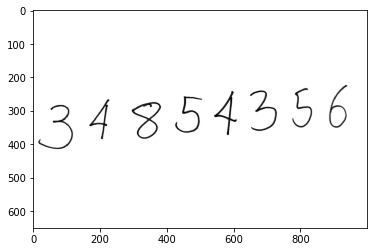

In [42]:
img_gauss = cv.GaussianBlur(img_gray, (5,5), 0)
plt.imshow(img_gauss, cmap='gray')
plt.show()

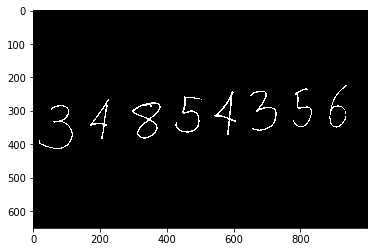

In [43]:
ret, img_th = cv.threshold(img_gauss, img_gray.max()/2, img_gray.max(), cv.THRESH_BINARY_INV)

plt.imshow(img_th, cmap='gray')
plt.show()

In [44]:
ctrs, hier = cv.findContours(img_th.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [45]:
rects = [cv.boundingRect(ctr) for ctr in ctrs]
rects # (x, y, width, height)

[(17, 284, 101, 131),
 (296, 276, 86, 108),
 (169, 267, 59, 118),
 (425, 258, 78, 108),
 (541, 243, 66, 130),
 (649, 241, 78, 119),
 (775, 234, 58, 116),
 (885, 225, 52, 126)]

In [46]:
rects.sort()
rects

[(17, 284, 101, 131),
 (169, 267, 59, 118),
 (296, 276, 86, 108),
 (425, 258, 78, 108),
 (541, 243, 66, 130),
 (649, 241, 78, 119),
 (775, 234, 58, 116),
 (885, 225, 52, 126)]

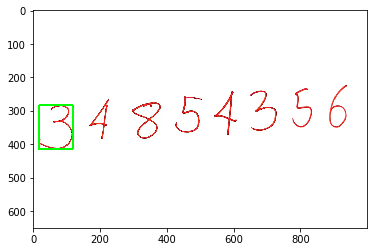

In [47]:
x, y, w, h = rects[0]
cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
plt.imshow(img)
plt.show()

In [48]:
start_row = y
end_row = y + h

start_col = x
end_col = x + w

new_roi = img_gauss[start_row: end_row, start_col : end_col]


In [49]:
final_size = 28
old_size = new_roi.shape[:2]
old_size

(131, 101)

In [50]:
ratio = float(final_size*0.8)/max(old_size)
ratio

0.17099236641221377

In [51]:
new_size = tuple([int(x*ratio) for x in old_size])
new_size

(22, 17)

In [52]:
# Resizing
new_roi = cv.resize(new_roi, (new_size[1], new_size[0]))

# Padding
delta_w = final_size - new_size[1]
delta_h = final_size - new_size[0]
top, bottom = delta_h//2, delta_h - (delta_h//2)
left, right = delta_w//2, delta_w - (delta_w//2)

# Creating a dark border
color = [255, 255, 255]
new_img = cv.copyMakeBorder(new_roi, top, bottom, left, right, cv.BORDER_CONSTANT, value=color)

new_img = cv.bitwise_not(new_img)

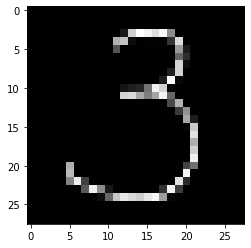

In [53]:
plt.imshow(new_img, cmap = 'gray')
plt.show()

In [54]:
# Organizing Everything
rois = []
# Wished size
final_size = 28

for rect in rects:
    
    # Rectangle Informations
    x, y, w, h = rect
    
    # Drawing the rectangle
    cv.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 3)
    
    # Selecting the sub-image(roi)
    start_row = y
    end_row = y + h
    start_col = x
    end_col = x + w
    new_roi = img_gauss[start_row: end_row, start_col : end_col]
    
    # Original size
    old_size = new_roi.shape[:2]
    
    # Proportion
    ratio = float(final_size*0.8)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    
    # Resizing the image
    new_roi = cv.resize(new_roi, (new_size[1], new_size[0]))
    
    # Padding
    delta_w = final_size - new_size[1]
    delta_h = final_size - new_size[0]
    top, bottom = delta_h//2, delta_h - (delta_h//2)
    left, right = delta_w//2, delta_w - (delta_w//2)

    # Creating a dark border
    color = [255, 255, 255]
    new_img = cv.copyMakeBorder(new_roi, top, bottom, left, right, cv.BORDER_CONSTANT, value=color)
    new_img = cv.bitwise_not(new_img)
    
    rois.append(new_img)
    

In [55]:
rois = np.array(rois)
rois.shape

(8, 28, 28)

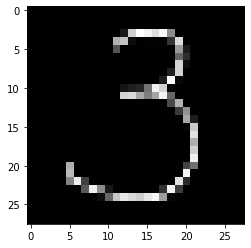

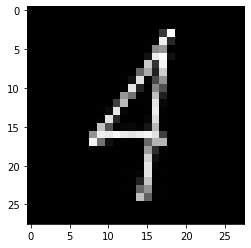

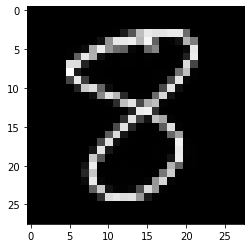

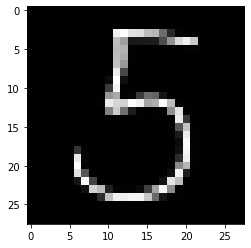

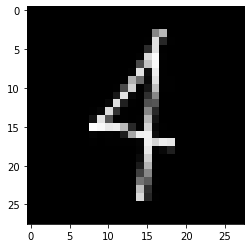

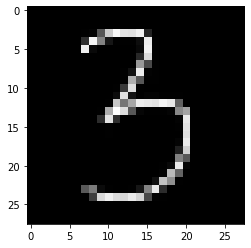

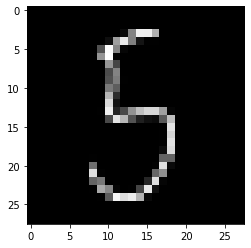

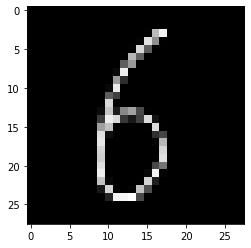

In [56]:
for i in range(len(rois)):
    plt.imshow(rois[i], cmap='gray')
    plt.show()

In [57]:
import h5py
from tensorflow.keras.models import load_model
model = load_model("Numbers_Recognizer.h5")

In [58]:
for roi in rois:
    roi = roi.reshape(1, 28*28)
    preds = model.predict_classes(roi)
    print(preds[0])

3
4
3
5
4
3
5
6


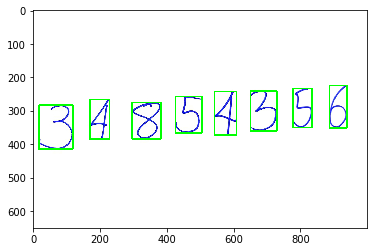

In [59]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()